In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from scipy import ndimage
import pandas as pd
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage import io, filters, measure, color, feature
import cv2 

In [4]:
image_brut = list()

for i in range(1, 201):
    try:
        image_brut.append(np.array(Image.open(fr"training\im-{i:03}_seg.png").convert("L")))
    except(IOError, OSError):
        pass

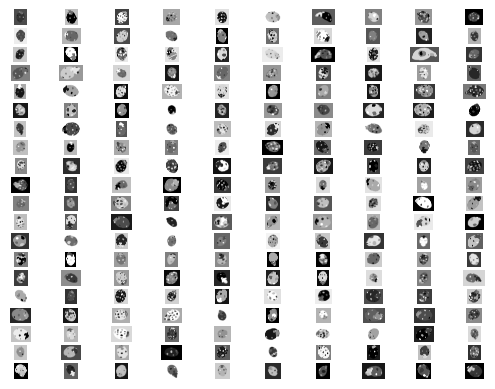

In [5]:
for i in range(200):
    ax = plt.subplot(20,10,i+1)
    plt.imshow(image_brut[i], cmap= "gray")
    plt.axis("off")

In [6]:
spot_number = []
for i, image in enumerate(image_brut):
    # Apply threshold to create a binary mask
    threshold = np.mean(image) + np.std(image)
    binary = image > threshold
    # Count the number of connected components
    labels, n_components = ndimage.label(binary)
    spot_number.append(n_components)
    
    # Optionally, plot the image with detected spots
    # plt.imshow(labels, cmap='jet')
    # plt.show()

# Write the spot_number values to the training_labels.csv file
labels_df = pd.read_csv("training_labels.csv")
labels_df["spot_number_1"] = spot_number
labels_df.to_csv("training_labels.csv", index=False)

In [7]:
spot_number = []
for i, image in enumerate(image_brut):
    # Apply Otsu's thresholding to create a binary image
    threshold = threshold_otsu(image)
    binary = image > threshold
    # Label the connected components
    labels = label(binary)
    # Compute the properties of each connected component
    props = regionprops(labels)
    # Count the number of spots based on their size
    min_size = 10  # minimum size of spots to count
    n_spots = sum([1 for prop in props if prop.area >= min_size])
    spot_number.append(n_spots)
    #print(f"Number of spots: {n_spots}")

# Write the spot_number values to the training_labels.csv file
labels_df = pd.read_csv("training_labels.csv")
labels_df["spot_number_2"] = spot_number
labels_df.to_csv("training_labels.csv", index=False)


In [8]:
spot_number = []
for i, image in enumerate(image_brut):
    # Threshold the image using Otsu's method
    thresh = filters.threshold_otsu(image)
    binary = image > thresh

    # Apply connected component analysis
    labels = measure.label(binary)

    # Count the number of spots (excluding the background label)
    count = len(np.unique(labels)) - 1

    # Record the count
    spot_number.append(count)

# Write the spot_number values to the training_labels.csv file
labels_df = pd.read_csv("training_labels.csv")
labels_df["spot_number_3"] = spot_number
labels_df.to_csv("training_labels.csv", index=False)

In [10]:
spot_number = []
for k in range(1, 201):
    # Load the RGB image
    seg_image = io.imread(f"training/im-{k:03}_seg.png")
    # Apply the blob_log algorithm to detect spots
    blobs_log = feature.blob_log(
        seg_image, min_sigma=15, max_sigma=20, num_sigma=10, threshold=.1)
    spot_number.append(len(blob))
    # Plot the original image with segmentation and detected blobs
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].imshow(seg_image)
    ax[0].set_title("Original Image")
    ax[1].imshow(seg_image)
    for blob in blob:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax[1].add_patch(c)
    ax[1].set_title("Detected Blobs")
    plt.show()

# Write the spot_number values to the training_labels.csv file
labels_df = pd.read_csv("training_labels.csv")
labels_df["spot_number_4"] = spot_number






labels_df.to_csv("training_labels.csv", index=False)

NameError: name 'blob' is not defined

In [ ]:
# Load the data from the CSV file into a Pandas DataFrame
df = pd.read_csv('training_labels.csv')

# Create a scatter plot of spot_number_1 vs. label
plt.scatter(df['Label'], df['spot_number_1'])
plt.xlabel('Label')
plt.ylabel('Spot Number 1')
plt.title('Spot Number 1 vs. Label')
plt.show()

# Create a scatter plot of spot_number_2 vs. label
plt.scatter(df['Label'], df['spot_number_2'])
plt.xlabel('Label')
plt.ylabel('Spot Number 1')
plt.title('Spot Number 2 vs. Label')
plt.show()

# Create a scatter plot of spot_number_1 vs. spot_number_2
plt.scatter(df['spot_number_1'], df['spot_number_2'])
plt.xlabel('Spot Number 1')
plt.ylabel('Spot Number 2')
plt.title('Spot Number 1 vs. Spot Number 2')
plt.show()